<h3 id="heading"><span style="background-color:#cefffb; color:#1b4946 ; display:fill;border-radius:5px; font-family:cursive"> 🛠️ ⚙️ Preprocessing </span></h3>

<h4 id="heading"><span style="background-color:#fcf3b9; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗑️ Clean the missing values </span></h4>

<h5 id="heading"><span style="background-color:#fcb9d0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗑️ Clean the missing numerical values </span></h5>

In [30]:
numerical_columns = ["Income", "Children", "Cars", "Age"]

# Select only the numeric columns from the DataFrame
numeric_df = raw_df[numerical_columns]

# Fill missing values in the numeric DataFrame with the mean of each column
cleaned_raw_df = numeric_df.fillna(numeric_df.mean().round().astype(int))

In [31]:
raw_df_num_clean = raw_df
raw_df_num_clean[numerical_columns] = cleaned_raw_df
raw_df = raw_df_num_clean

In [32]:
# Check if any column has missing values
has_missing_values = raw_df_num_clean.isnull().any()

# Print only the column that having missing value
columns_with_missing_values = has_missing_values[has_missing_values]
print(columns_with_missing_values)

Marital Status    True
Gender            True
Home Owner        True
dtype: bool


<h5 id="heading"><span style="background-color:#fcb9d0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗑️ Clean the missing categorical values </span></h5>

In [33]:
median_age_by_status = raw_df.groupby('Marital Status')['Age'].median()

# Print the result
print(median_age_by_status)

Marital Status
Married    46.0
Single     40.0
Name: Age, dtype: float64


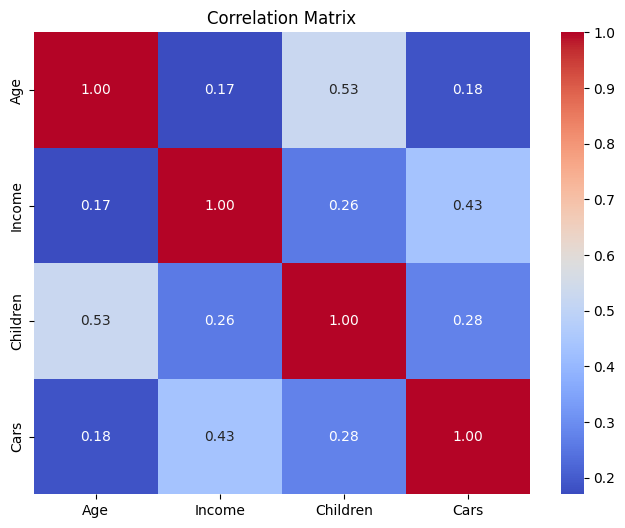

In [34]:
# Select numerical columns for correlation analysis
numerical_columns = ["Age", "Income", "Children", "Cars"]

# Create a correlation matrix
correlation_matrix = cleaned_raw_df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**We want to understand the relation between number of children and age and marital status to fill the missing value**

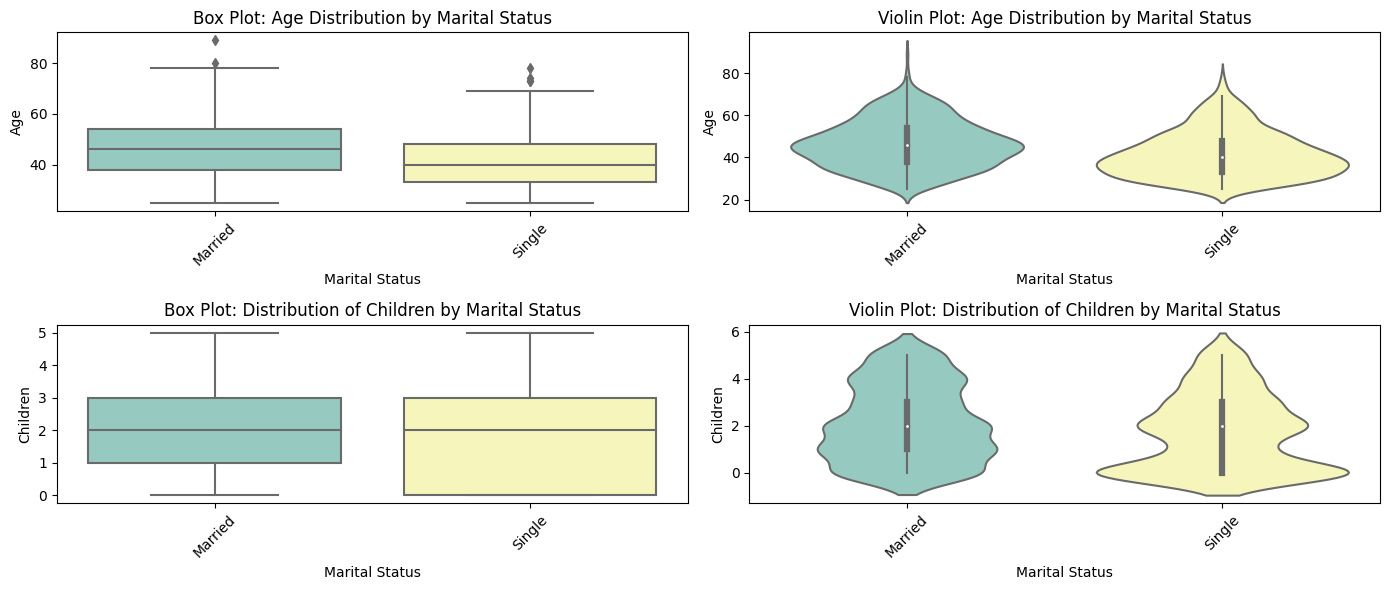

In [35]:
# Create a 1x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 6))

# Flatten the axes array in case we have only one row of subplots
axes = axes.flatten()

# Box plot on the first subplot
sns.boxplot(x='Marital Status', y='Age', data=raw_df, ax=axes[0])
axes[0].set_xlabel('Marital Status')
axes[0].set_ylabel('Age')
axes[0].set_title('Box Plot: Age Distribution by Marital Status')
axes[0].tick_params(axis='x', rotation=45)

# Violin plot on the second subplot
sns.violinplot(x='Marital Status', y='Age', data=raw_df, ax=axes[1])
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Age')
axes[1].set_title('Violin Plot: Age Distribution by Marital Status')
axes[1].tick_params(axis='x', rotation=45)

# Box plot on the first subplot
sns.boxplot(x='Marital Status', y='Children', data=raw_df, ax= axes[2])
axes[2].set_xlabel('Marital Status')
axes[2].set_ylabel('Children')
axes[2].set_title('Box Plot: Distribution of Children by Marital Status')
axes[2].tick_params(axis='x', rotation=45)

# Violin plot to compare the distribution of Children for each category of Marital Status
sns.violinplot(x='Marital Status', y='Children', data=raw_df, ax=axes[3])
axes[3].set_xlabel('Marital Status')
axes[3].set_ylabel('Children')
axes[3].set_title('Violin Plot: Distribution of Children by Marital Status')
axes[3].tick_params(axis='x', rotation=45)

# Adjust layout to avoid overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

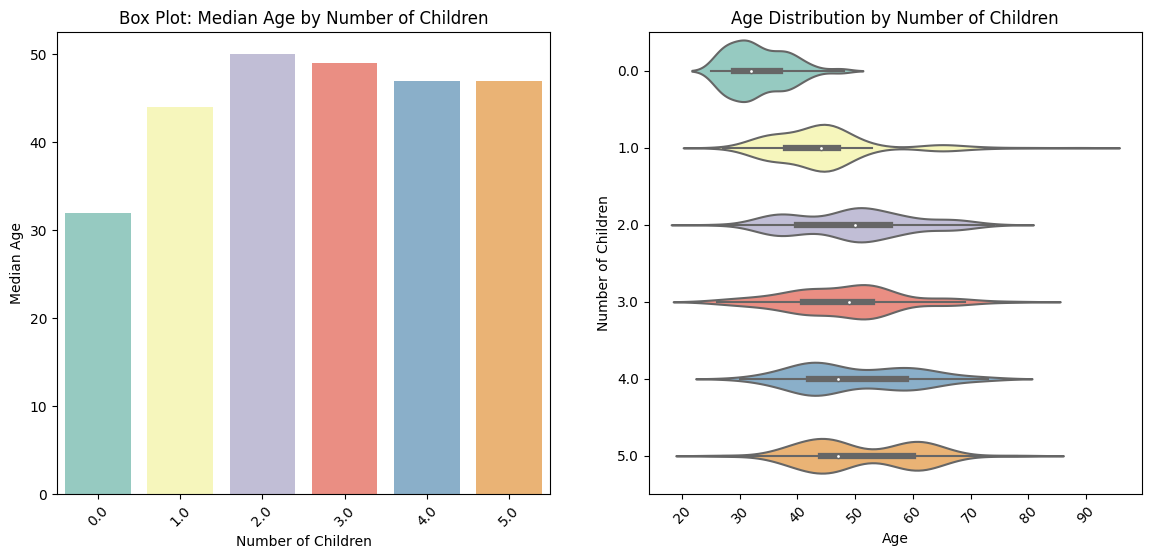

In [36]:
# Calculate the median age for each category of Children
median_age_by_children = raw_df.groupby('Children')['Age'].median().reset_index()


fig, axes = plt.subplots(1, 2, figsize=(14, 6))



# Create a bar plot to show the median age for each category of Children
sns.barplot(x='Children', y='Age', data=median_age_by_children, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Number of Children')
axes[0].set_ylabel('Median Age')
axes[0].set_title('Box Plot: Median Age by Number of Children')
axes[0].tick_params(axis='x', rotation=45)

# Create the violin plot
sns.violinplot(y='Children', x='Age', data=raw_df, orient='h', palette='Set3', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Number of Children')
axes[1].set_title('Age Distribution by Number of Children')
axes[1].tick_params(axis='x', rotation=45)


plt.show()

In [37]:
print(f"Range of age values is between {raw_df['Age'].min().round().astype(int)} and {int(raw_df['Age'].max())}")

Range of age values is between 25 and 89


In [38]:
# Group the data by "Age" and "Marital Status"
grouped_df = raw_df.groupby(['Age', 'Marital Status']).size().reset_index(name='Count')

# Calculate the total count of each age group
total_count_by_age = grouped_df.groupby('Age')['Count'].sum().reset_index(name='Total Count')

# Merge the grouped data with the total counts
merged_df = grouped_df.merge(total_count_by_age, on='Age', suffixes=('', '_total'))

# Calculate the probability of each category within each age group
merged_df['Probability'] = merged_df['Count'] / merged_df['Total Count']

# Filter the DataFrame to only include "Single" and "Married" categories
result_df = merged_df[merged_df['Marital Status'].isin(['Single', 'Married'])]

print(result_df)

     Age Marital Status  Count  Total Count  Probability
0   25.0        Married      2            5     0.400000
1   25.0         Single      3            5     0.600000
2   26.0        Married      5           16     0.312500
3   26.0         Single     11           16     0.687500
4   27.0        Married     10           23     0.434783
5   27.0         Single     13           23     0.565217
6   28.0        Married      7           21     0.333333
7   28.0         Single     14           21     0.666667
8   29.0        Married      5           16     0.312500
9   29.0         Single     11           16     0.687500
10  30.0        Married      8           26     0.307692
11  30.0         Single     18           26     0.692308
12  31.0        Married      5           25     0.200000
13  31.0         Single     20           25     0.800000
14  32.0        Married     18           33     0.545455
15  32.0         Single     15           33     0.454545
16  33.0        Married      8 

In [39]:
def calculate_probability_by_age_group(df, age_start, age_end):
    # Filter the DataFrame based on the age condition
    age_condition = (df['Age'] >= age_start) & (df['Age'] <= age_end)
    filtered_df = df.loc[age_condition]

    # Group the filtered data by "Marital Status" and calculate the size (count) of each group
    grouped_df = filtered_df.groupby('Marital Status').size().reset_index(name='Count')

    # Calculate the total count for the age group
    total_count = grouped_df['Count'].sum()

    # Calculate the probability of each value of marital status in the age group
    grouped_df['Probability'] = grouped_df['Count'] / total_count

    return grouped_df

# Call the function for each age group
grouped_df_under_30 = calculate_probability_by_age_group(raw_df, 0, 30)
grouped_df_between_30_40 = calculate_probability_by_age_group(raw_df, 31, 40)
grouped_df_over_40 = calculate_probability_by_age_group(raw_df, 41, raw_df['Age'].max())

# Print the total probability for each value of marital status in each age group
print("Probability for age under 30:")
print(grouped_df_under_30)

print("\nProbability for age between 30 and 40:")
print(grouped_df_between_30_40)

print("\nProbability for age over 40:")
print(grouped_df_over_40)

Probability for age under 30:
  Marital Status  Count  Probability
0        Married     37     0.345794
1         Single     70     0.654206

Probability for age between 30 and 40:
  Marital Status  Count  Probability
0        Married    138     0.445161
1         Single    172     0.554839

Probability for age over 40:
  Marital Status  Count  Probability
0        Married    360        0.625
1         Single    216        0.375


In [40]:
# Create a new column for age groups based on the 'Age' column
raw_df['Age Group'] = pd.cut(raw_df['Age'], bins=[0, 30, 40, raw_df['Age'].max()], labels=['Under 30', '30-40', 'Over 40'])

# Use pd.crosstab() to calculate the probability for each value of marital status in each age group
cross_tab = pd.crosstab(raw_df['Marital Status'], raw_df['Age Group'], normalize='index')

print(cross_tab)

Age Group       Under 30     30-40   Over 40
Marital Status                              
Married         0.069159  0.257944  0.672897
Single          0.152838  0.375546  0.471616


In [41]:
raw_df.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Over 40
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Over 40
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Over 40
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,Over 40
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,30-40


<h5 id="heading"><span style="background-color:#fcb9d0; color:#3d3710 ; display:fill;border-radius:5px; font-family:Georgia">🗑️ Clean the missing categorical values </span></h5>

In [42]:
# Check if Marital Status column has missing values
has_missing_values = raw_df['Marital Status'].isnull()

# Print the result
# print(has_missing_values)

# Print only the ID that having missing value
columns_with_missing_values = has_missing_values[has_missing_values]
print(columns_with_missing_values)

8      True
27     True
49     True
98     True
150    True
234    True
301    True
Name: Marital Status, dtype: bool


In [43]:
# Fill missing values in 'Marital Status' based on the age group condition
raw_df.loc[(raw_df['Age'] <= 40) & (pd.isna(raw_df['Marital Status'])), 'Marital Status'] = 'Single'
raw_df.loc[(raw_df['Age'] > 40) & (pd.isna(raw_df['Marital Status'])), 'Marital Status'] = 'Married'

# Drop the 'Age Group' column if not needed anymore
#raw_df.drop('Age Group', axis=1, inplace=True)

# Now the missing values in 'Marital Status' should be filled based on the age group condition
raw_df.head()


,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No,Over 40
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No,Over 40
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No,Over 40
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,Over 40
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes,30-40


In [44]:
# Check the old ID that have missing Marital status if they are filled
raw_df.loc[49]

ID                      14939
Marital Status         Single
Gender                   Male
Income                40000.0
Children                  0.0
Education           Bachelors
Occupation           Clerical
Home Owner                Yes
Cars                      0.0
Commute Distance    0-1 Miles
Region                 Europe
Age                      39.0
Purchased Bike            Yes
Age Group               30-40
Name: 49, dtype: object

In [45]:
Missing_column = raw_df.isnull().any()
Missing_column[Missing_column]

Gender        True
Home Owner    True
dtype: bool

In [46]:
# Check if Gender column has missing values
has_missing_values = raw_df['Gender'].isnull()

# Print the result
# print(has_missing_values)

# Print only the ID that having missing value in Gender
Gender_with_missing_values = has_missing_values[has_missing_values]
print(Gender_with_missing_values)

3      True
154    True
335    True
601    True
688    True
695    True
867    True
908    True
951    True
973    True
997    True
Name: Gender, dtype: bool


In [47]:
raw_df.loc[Gender_with_missing_values.index]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,Over 40
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No,30-40
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No,30-40
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No,Over 40
688,11699,Single,NaN,60000.0,2.0,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,44.0,No,Over 40
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No,Over 40
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No,Over 40
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes,Over 40
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No,30-40
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No,Over 40


In [48]:
raw_df.loc[Gender_with_missing_values.index]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,Over 40
154,23426,Single,NaN,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No,30-40
335,24369,Married,NaN,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No,30-40
601,29231,Single,NaN,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No,Over 40
688,11699,Single,NaN,60000.0,2.0,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,44.0,No,Over 40
695,18390,Married,NaN,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No,Over 40
867,26693,Married,NaN,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No,Over 40
908,23195,Single,NaN,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes,Over 40
951,22296,Married,NaN,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No,30-40
973,11734,Married,NaN,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No,Over 40


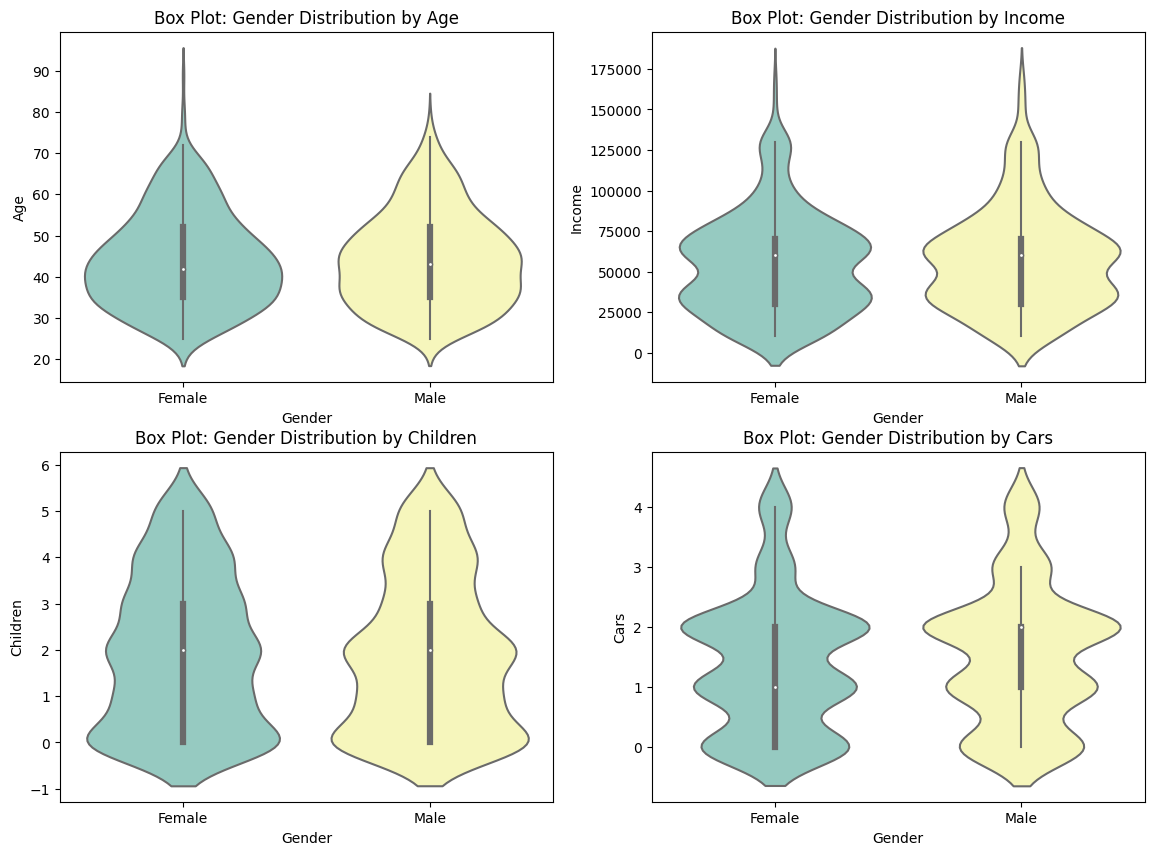

In [49]:


# Create a 1x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Flatten the axes array in case we have only one row of subplots
axes = axes.flatten()

# Box plot on the first subplot
for i in range(len(numerical_columns)):
    sns.violinplot(x='Gender', y=numerical_columns[i] , data=raw_df, ax=axes[i])
    axes[i].set_xlabel('Gender')
    axes[i].set_ylabel(numerical_columns[i])
    axes[i].set_title(f'Box Plot: Gender Distribution by {numerical_columns[i]}')
    axes[i].tick_params(axis='x')

plt.show()


In [50]:
range(len(numerical_columns))

range(0, 4)

From the the distributions above we can say that most of women has less then one cars unsted the most of men have over 1 car 

In [51]:
def calculate_probability_by_car_group(df, min_cars, max_cars):
    # Filter the DataFrame based on the age condition
    cars_condition = (df['Cars'] >= min_cars) & (df['Cars'] <= max_cars)
    filtered_df = df.loc[cars_condition]

    # Group the filtered data by "Marital Status" and calculate the size (count) of each group
    grouped_df = filtered_df.groupby('Gender').size().reset_index(name='Count')

    # Calculate the total count for the age group
    total_count = grouped_df['Count'].sum()

    # Calculate the probability of each value of marital status in the age group
    grouped_df['Probability'] = grouped_df['Count'] / total_count

    return grouped_df

# Call the function for each cars group
grouped_df_under_1 = calculate_probability_by_car_group(raw_df, 0, 1)
grouped_df_between_1_2 = calculate_probability_by_car_group(raw_df, 1, 2)
grouped_df_between_2_3 = calculate_probability_by_car_group(raw_df, 2, 3)
grouped_df_over_4 = calculate_probability_by_car_group(raw_df, 4, raw_df['Cars'].max())

# Print the total probability for each value of Gender in each cars group
print("Probability for number cars under 1:")
print(grouped_df_under_1)

print("\nProbability for number cars between 1 and 2:")
print(grouped_df_between_1_2)

print("\nProbability for number cars between 1 and 2:")
print(grouped_df_between_2_3)

print("\nProbability for number cars over 4:")
print(grouped_df_over_4)

Probability for number cars under 1:
   Gender  Count  Probability
0  Female    266     0.522593
1    Male    243     0.477407

Probability for number cars between 1 and 2:
   Gender  Count  Probability
0  Female    301     0.494253
1    Male    308     0.505747

Probability for number cars between 1 and 2:
   Gender  Count  Probability
0  Female    195     0.463183
1    Male    226     0.536817

Probability for number cars over 4:
   Gender  Count  Probability
0  Female     28     0.474576
1    Male     31     0.525424


We can see that the probability of being women is higher when the number of owned car are less then 1

And the higher probability of being men is when they have the number of cars mors then 1 

So we can fill the missing value by the above information.

After that we can compare with the cleaned data that provided in the first cells

In [52]:
# Fill missing values in 'Gender' based on the cars group condition
raw_df.loc[(raw_df['Cars'] <= 1) & (pd.isna(raw_df['Gender'])), 'Gender'] = 'Female'
raw_df.loc[(raw_df['Cars'] >= 2) & (pd.isna(raw_df['Gender'])), 'Gender'] = 'Male'

# Drop the 'Age Group' column if not needed anymore
#raw_df.drop('Age Group', axis=1, inplace=True)

# Now the missing values in 'Marital Status' should be filled based on the age group condition
raw_df.loc[Gender_with_missing_values.index]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
3,24381,Single,Female,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes,Over 40
154,23426,Single,Male,80000.0,5.0,Graduate Degree,Management,Yes,3.0,0-1 Miles,Pacific,40.0,No,30-40
335,24369,Married,Male,80000.0,5.0,Graduate Degree,Management,No,2.0,0-1 Miles,Pacific,39.0,No,30-40
601,29231,Single,Male,80000.0,4.0,Partial College,Professional,No,2.0,0-1 Miles,North America,43.0,No,Over 40
688,11699,Single,Male,60000.0,2.0,Bachelors,Skilled Manual,No,2.0,0-1 Miles,North America,44.0,No,Over 40
695,18390,Married,Male,80000.0,5.0,Partial College,Professional,Yes,2.0,0-1 Miles,North America,44.0,No,Over 40
867,26693,Married,Female,70000.0,3.0,Partial College,Professional,Yes,1.0,5-10 Miles,North America,49.0,No,Over 40
908,23195,Single,Male,50000.0,3.0,Bachelors,Skilled Manual,Yes,2.0,2-5 Miles,North America,41.0,Yes,Over 40
951,22296,Married,Female,70000.0,0.0,Bachelors,Professional,No,1.0,0-1 Miles,North America,38.0,No,30-40
973,11734,Married,Female,60000.0,1.0,Partial College,Skilled Manual,No,1.0,0-1 Miles,North America,47.0,No,Over 40


For the Home owner is absolutly related to the Income

Let do some plot to understund the corolation between home owener and income

In [53]:
# Check if Home Owner column has missing values
has_missing_values = raw_df['Home Owner'].isnull()

# Print the result
# print(has_missing_values)

# Print only the ID that having missing value in Home Owner
Home_with_missing_values = has_missing_values[has_missing_values]
print(Home_with_missing_values)

6      True
365    True
646    True
943    True
Name: Home Owner, dtype: bool


In [54]:
raw_df.loc[Home_with_missing_values.index]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes,30-40
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,NaN,0.0,0-1 Miles,Europe,38.0,Yes,30-40
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,NaN,0.0,1-2 Miles,North America,47.0,No,Over 40
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,NaN,2.0,0-1 Miles,North America,42.0,No,Over 40


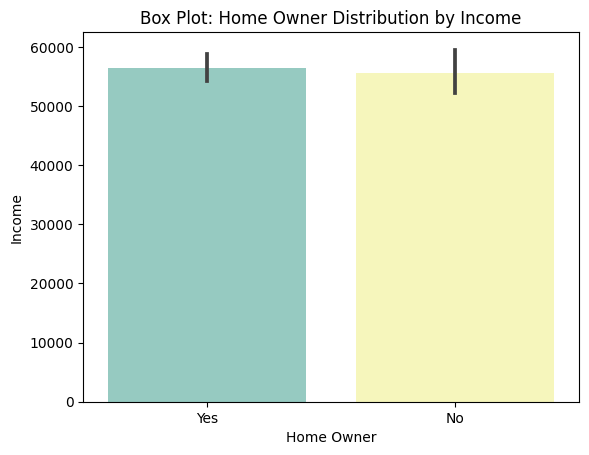

In [55]:

sns.barplot(x='Home Owner', y='Income' , data=raw_df)
plt.xlabel('Home Owner')
plt.ylabel('Income')
plt.title('Box Plot: Home Owner Distribution by Income')


plt.show()

In [56]:
# Fill missing values in 'Gender' based on the cars group condition
raw_df.loc[(raw_df['Income'] <= raw_df['Income'].mean()) & (pd.isna(raw_df['Home Owner'])), 'Home Owner'] = 'No'
raw_df.loc[(raw_df['Income'] > raw_df['Income'].mean()) & (pd.isna(raw_df['Home Owner'])), 'Home Owner'] = 'Yes'

# Drop the 'Age Group' column if not needed anymore
#raw_df.drop('Age Group', axis=1, inplace=True)

# Now the missing values in 'Marital Status' should be filled based on the age group condition
raw_df.loc[Home_with_missing_values.index]

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike,Age Group
6,27974,Single,Male,160000.0,2.0,High School,Management,Yes,4.0,0-1 Miles,Pacific,33.0,Yes,30-40
365,22636,Single,Female,40000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,38.0,Yes,30-40
646,16247,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,Yes,0.0,1-2 Miles,North America,47.0,No,Over 40
943,24322,Married,Female,60000.0,4.0,Bachelors,Skilled Manual,Yes,2.0,0-1 Miles,North America,42.0,No,Over 40


In [57]:
raw_df.isnull().any()

ID                  False
Marital Status      False
Gender              False
Income              False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Purchased Bike      False
Age Group           False
dtype: bool